<a href="https://colab.research.google.com/github/lipeng2021/-python1/blob/main/softmax-easy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from IPython import display
from torch.nn import init 
import time
import sys
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
FILENAME = '../content/sample_data/FashionMNIST'

In [6]:
mnist_train = torchvision.datasets.FashionMNIST(root=FILENAME,train=True,download=True,transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root=FILENAME,train=False,download=True,transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../content/sample_data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../content/sample_data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../content/sample_data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../content/sample_data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../content/sample_data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../content/sample_data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../content/sample_data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../content/sample_data/FashionMNIST/FashionMNIST/raw



In [7]:
def get_fashion_mnist_labels(labels):
  text_labels = ['t-shirt','trouser','pullover','dress','coat','sandal','sneaker','bag','ankle','boot']
  return [text_labels[int(i)] for i in labels]

In [8]:
def set_svg_figure():
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  set_svg_figure()
  plt.rcParams['figure_figsize']=figsize

In [15]:
def show_fashion_mnist(images,labels):
  set_svg_figure()
  _,figs = plt.subplots(1,len(images),figsize=(12,12))
  for f,img,lbl in zip(figs,images,labels):
    f.imshow(img.view((28,28)).numpy())
    f.set_title(lbl)
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)
  plt.show()

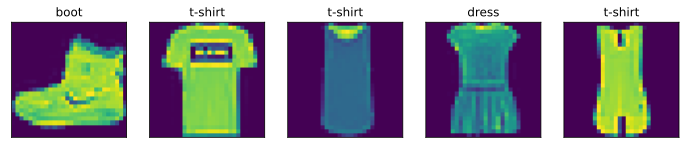

In [16]:
X,y=[],[]
for i in range(5):
  X.append(mnist_train[i][0])
  y.append(mnist_train[i][1])
show_fashion_mnist(X,get_fashion_mnist_labels(y))

In [11]:
batch_size = 256
if sys.platform.startswith('win'):
  num_workers = 0
else:
  num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers = num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers = num_workers)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


定义函数

In [21]:
num_inputs = 784
num_outputs = 10
class LinearNet(nn.Module):
  def __init__(self,num_inputs,num_outputs):
    super(LinearNet,self).__init__()
    self.linear = nn.Linear(num_inputs,num_outputs)
  def forward(self,x):
    y = self.linear(x.view(x.shape[0],-1))
    return y
net = LinearNet(num_inputs,num_outputs)

In [ ]:
class FlattenLayer(nn.Module):
  def __init__(self):
    super(FlattenLayer,self).__init__()
  def forward(self,x):
    return x.view(x.shape[0],-1)

In [ ]:
from collections import OrderedDict
net = nn.Sequential(
    OrderedDict([
      ('flatten',FlattenLayer()),
      ('linear',nn.Linear(num_inputs,num_outputs))])
)

In [ ]:
init.normal_(net.linear.weight,mean=0,std=0.01)
init.constant_(net.linear.bias,val=0)

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
optimizer = optim.SGD(net.parameters(),lr = 0.1)